In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
from src.data_utils import load_similarities

In [3]:
similarity, similarity_failures = load_similarities()

# Diversity

### Diversity of valid tests

In [4]:
from src.plots import plot_similarity

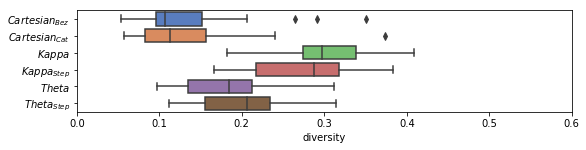

In [5]:
plot_similarity(similarity, metric='procrustes_frechet_norm', xlim=[0.0, 0.6])
plt.savefig('./figures/similarity.pdf') 

### Diversity of tests that produced failures

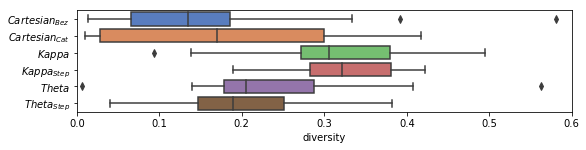

In [6]:
plot_similarity(similarity_failures, metric='procrustes_frechet_norm', xlim=[0.0, 0.6])
plt.savefig('./figures/similarity_failures.pdf') 

## Statistical Test

### Valid

In [7]:
metric = 'procrustes_frechet_norm'
subject = {}
for rep in similarity.representation.unique():
    subject[rep] = similarity[(similarity.method==metric) & (similarity.representation==rep)]['value']

In [8]:
representations = subject.keys()

#### Shapiro

In [9]:
from scipy.stats import shapiro
# null hypothesis: is it equal to normal distribution
# alternative: is not... 

ci = 0.05 # less than ci --> reject null hypothesis 

for rep in representations:
    shapiro_rep = shapiro(subject[rep])
    label = '' if shapiro_rep.pvalue < ci else '(Normal)'
    print(f'{rep}: {shapiro_rep.pvalue} {label}')

bezier: 0.00021865109738428146 
cartesian: 5.284824874252081e-05 
kappa: 0.9398635625839233 (Normal)
kappa+step: 0.1758185774087906 (Normal)
theta: 0.07638411223888397 (Normal)
theta+step: 0.6125253438949585 (Normal)


#### U-Test with A12

In [10]:
from src.stats_tests import u_test_by_representations, u_test_a12_by_representation, pretty_latex

In [11]:
test = u_test_by_representations(subject, representations)
test

,bezier,cartesian,kappa,kappa+step,theta,theta+step
subject,,,,,,
bezier,NaN,0.310202,9.283669e-10,5.511700e-09,3.101327e-04,8.739567e-06
cartesian,NaN,NaN,2.786327e-10,9.283669e-10,4.073242e-05,1.001146e-06
kappa,NaN,NaN,NaN,3.622280e-02,8.489763e-09,1.982383e-08
kappa+step,NaN,NaN,NaN,NaN,1.339209e-06,6.238527e-05
theta,NaN,NaN,NaN,NaN,NaN,5.116313e-02
theta+step,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
test = u_test_a12_by_representation(subject, representations)
test

,bezier,cartesian,kappa,kappa+step,theta,theta+step
subject,,,,,,
bezier,-,\same,\worse (0.0478),\worse (0.07),\worse (0.242),\worse (0.177)
cartesian,\same,-,\worse (0.0333),\worse (0.0478),\worse (0.203),\worse (0.142)
kappa,\better (0.952),\better (0.967),-,\better (0.636),\better (0.924),\better (0.913)
kappa+step,\better (0.93),\better (0.952),\worse (0.364),-,\better (0.853),\better (0.789)
theta,\better (0.758),\better (0.797),\worse (0.0756),\worse (0.147),-,\same
theta+step,\better (0.823),\better (0.858),\worse (0.0867),\worse (0.211),\same,-


In [13]:
pretty_latex(test)

\begin{tabular}{ccccccc}
\toprule
{} &           bezier &        cartesian &            kappa &       kappa+step &            theta &       theta+step \\
\midrule
bezier     &                - &            \same &  \worse (0.0478) &    \worse (0.07) &   \worse (0.242) &   \worse (0.177) \\
cartesian  &            \same &                - &  \worse (0.0333) &  \worse (0.0478) &   \worse (0.203) &   \worse (0.142) \\
kappa      &  \better (0.952) &  \better (0.967) &                - &  \better (0.636) &  \better (0.924) &  \better (0.913) \\
kappa+step &   \better (0.93) &  \better (0.952) &   \worse (0.364) &                - &  \better (0.853) &  \better (0.789) \\
theta      &  \better (0.758) &  \better (0.797) &  \worse (0.0756) &   \worse (0.147) &                - &            \same \\
theta+step &  \better (0.823) &  \better (0.858) &  \worse (0.0867) &   \worse (0.211) &            \same &                - \\
\bottomrule
\end{tabular}



### Failures 

In [14]:
metric = 'procrustes_frechet_norm'
subject = {}
for rep in similarity_failures.representation.unique():
    subject[rep] = similarity_failures[(similarity_failures.method==metric) & (similarity_failures.representation==rep)]['value']

In [15]:
representations = subject.keys()

In [16]:
print('Number of experiments in which no failure was triggered:')
for k,v in subject.items():
    print(k, 30 - len(v.dropna()))

Number of experiments in which no failure was triggered:
bezier 8
cartesian 15
kappa 0
kappa+step 0
theta 4
theta+step 1


#### Shapiro

In [17]:
from scipy.stats import shapiro
# null hypothesis: is it equal to normal distribution
# alternative: is not... 

ci = 0.05 # less than ci --> reject null hypothesis 

for rep in representations:
    shapiro_rep = shapiro(subject[rep].dropna())
    label = '' if shapiro_rep.pvalue < ci else '(Normal)'
    print(f'{rep}: {shapiro_rep.pvalue} {label}')

bezier: 0.004750432446599007 
cartesian: 0.027674688026309013 
kappa: 0.6887685060501099 (Normal)
kappa+step: 0.22773434221744537 (Normal)
theta: 0.022258540615439415 
theta+step: 0.40584543347358704 (Normal)


#### U-Test with A12

In [18]:
from src.stats_tests import u_test_by_representations, u_test_a12_by_representation, pretty_latex

In [19]:
test = u_test_by_representations(subject, representations)
test

,bezier,cartesian,kappa,kappa+step,theta,theta+step
subject,,,,,,
bezier,NaN,0.372662,0.000011,0.000002,0.001948,0.014023
cartesian,NaN,NaN,0.005934,0.003378,0.114205,0.199945
kappa,NaN,NaN,NaN,0.255299,0.001154,0.000027
kappa+step,NaN,NaN,NaN,NaN,0.000081,0.000002
theta,NaN,NaN,NaN,NaN,NaN,0.104570
theta+step,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
pretty_latex(test)

\begin{tabular}{ccccccc}
\toprule
{} &  bezier &  cartesian &   kappa &  kappa+step &   theta &  theta+step \\
\midrule
bezier     &       - &       0.37 & 1.1e-05 &     1.9e-06 &  0.0019 &       0.014 \\
cartesian  &       - &          - &  0.0059 &      0.0034 &    0.11 &         0.2 \\
kappa      &       - &          - &       - &        0.26 &  0.0012 &     2.7e-05 \\
kappa+step &       - &          - &       - &           - & 8.1e-05 &     1.9e-06 \\
theta      &       - &          - &       - &           - &       - &         0.1 \\
theta+step &       - &          - &       - &           - &       - &           - \\
\bottomrule
\end{tabular}



In [21]:
test = u_test_a12_by_representation(subject, representations)
test

,bezier,cartesian,kappa,kappa+step,theta,theta+step
subject,,,,,,
bezier,-,\same,\worse (0.152),\worse (0.121),\worse (0.255),\worse (0.318)
cartesian,\same,-,\worse (0.267),\worse (0.249),\same,\same
kappa,\better (0.848),\better (0.733),-,\same,\better (0.738),\better (0.807)
kappa+step,\better (0.879),\better (0.751),\same,-,\better (0.795),\better (0.851)
theta,\better (0.745),\same,\worse (0.262),\worse (0.205),-,\same
theta+step,\better (0.682),\same,\worse (0.193),\worse (0.149),\same,-


In [22]:
pretty_latex(test)

\begin{tabular}{ccccccc}
\toprule
{} &           bezier &        cartesian &           kappa &      kappa+step &            theta &       theta+step \\
\midrule
bezier     &                - &            \same &  \worse (0.152) &  \worse (0.121) &   \worse (0.255) &   \worse (0.318) \\
cartesian  &            \same &                - &  \worse (0.267) &  \worse (0.249) &            \same &            \same \\
kappa      &  \better (0.848) &  \better (0.733) &               - &           \same &  \better (0.738) &  \better (0.807) \\
kappa+step &  \better (0.879) &  \better (0.751) &           \same &               - &  \better (0.795) &  \better (0.851) \\
theta      &  \better (0.745) &            \same &  \worse (0.262) &  \worse (0.205) &                - &            \same \\
theta+step &  \better (0.682) &            \same &  \worse (0.193) &  \worse (0.149) &            \same &                - \\
\bottomrule
\end{tabular}

